In [157]:
# İlgili kütüphaneler import edilir

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [158]:
# Veri setini okumak
df = pd.read_csv("Mobile phone price.csv",delimiter=",")
df

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [159]:
print(df.columns)

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')


In [160]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [162]:
# sayısal değişkenlerin listesi
numerical_features_1 = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_1))

# sayısal değişkenleri görelim
df[numerical_features_1].head()

Number of numerical variables:  1


,Battery Capacity (mAh)
0,3095
1,5000
2,4500
3,5020
4,4614


In [163]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}

    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)
        
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []
        
        result_dict[dtype_str].append(col)

    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'

    return result_str

# df DataFrame'iniz olduğunu varsayalım
result = sütunlari_veri_türune_gore_grupla(df)

# Sonuçları görüntüleme
print(result)


object Veri Türü Sütunları:
Brand, Model, Storage , RAM , Screen Size (inches), Camera (MP), Price ($)

int64 Veri Türü Sütunları:
Battery Capacity (mAh)



In [164]:
from sklearn.preprocessing import LabelEncoder

# Replace 'NAType' with NaN
df.replace('NAType', pd.NA, inplace=True)
# Columns to encode
columns_to_encode = ['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)', 'Camera (MP)', 'Price ($)']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each column using LabelEncoder
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col].astype(str))

# Now, df contains the encoded values

In [165]:
# from sklearn.preprocessing import LabelEncoder

# labelEncoder = ['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)', 'Camera (MP)', 'Price ($)']
# le_dict = {}

# for column in labelEncoder:
#     le = LabelEncoder()
#     df[column] = le.fit_transform(df[column])
#     le_dict[column] = le
# df.head()

In [166]:
# Create a dictionary to store the mapping of encoded values to original categories
encoding_mapping = {}

# Loop through the columns and get the mapping
for col in columns_to_encode:
    encoding_mapping[col] = dict(zip(le.transform(le.classes_), le.classes_))

# Print the encoding mapping for each column
for col in columns_to_encode:
    print(f"Encoding mapping for '{col}':")
    print(encoding_mapping[col])

Encoding mapping for 'Brand':
{0: '$1,199 ', 1: '$1,299 ', 2: '$109 ', 3: '$119 ', 4: '$129 ', 5: '$139 ', 6: '$149 ', 7: '$159 ', 8: '$169 ', 9: '$179 ', 10: '$189 ', 11: '$199 ', 12: '$209 ', 13: '$219 ', 14: '$229 ', 15: '$239 ', 16: '$249 ', 17: '$269 ', 18: '$279 ', 19: '$289 ', 20: '$299 ', 21: '$309 ', 22: '$319 ', 23: '$329 ', 24: '$339 ', 25: '$349 ', 26: '$369 ', 27: '$379 ', 28: '$389 ', 29: '$399 ', 30: '$429 ', 31: '$449 ', 32: '$469 ', 33: '$499 ', 34: '$549 ', 35: '$699 ', 36: '$799 ', 37: '$849 ', 38: '$899 ', 39: '$969 ', 40: '$99 ', 41: '$999 ', 42: '1049', 43: '1099', 44: '119', 45: '1199', 46: '129', 47: '1299', 48: '130', 49: '139', 50: '1399', 51: '149', 52: '159', 53: '169', 54: '179', 55: '189', 56: '199', 57: '1999', 58: '229', 59: '239', 60: '249', 61: '259', 62: '269', 63: '279', 64: '299', 65: '319', 66: '329', 67: '349', 68: '359', 69: '369', 70: '379', 71: '399', 72: '419', 73: '429', 74: '449', 75: '459', 76: '499', 77: '529', 78: '599', 79: '649', 80: '6

In [167]:
# Create a dictionary to store the mapping of encoded values to original categories
encoding_mapping = {}

# Loop through the columns and get the mapping
for col in columns_to_encode:
    encoding_mapping[col] = dict(zip(le.transform(le.classes_), le.classes_))

# Print the encoding mapping for each column
for col in columns_to_encode:
    print(f"Encoding mapping for '{col}':")
    print(encoding_mapping[col])

Encoding mapping for 'Brand':
{0: '$1,199 ', 1: '$1,299 ', 2: '$109 ', 3: '$119 ', 4: '$129 ', 5: '$139 ', 6: '$149 ', 7: '$159 ', 8: '$169 ', 9: '$179 ', 10: '$189 ', 11: '$199 ', 12: '$209 ', 13: '$219 ', 14: '$229 ', 15: '$239 ', 16: '$249 ', 17: '$269 ', 18: '$279 ', 19: '$289 ', 20: '$299 ', 21: '$309 ', 22: '$319 ', 23: '$329 ', 24: '$339 ', 25: '$349 ', 26: '$369 ', 27: '$379 ', 28: '$389 ', 29: '$399 ', 30: '$429 ', 31: '$449 ', 32: '$469 ', 33: '$499 ', 34: '$549 ', 35: '$699 ', 36: '$799 ', 37: '$849 ', 38: '$899 ', 39: '$969 ', 40: '$99 ', 41: '$999 ', 42: '1049', 43: '1099', 44: '119', 45: '1199', 46: '129', 47: '1299', 48: '130', 49: '139', 50: '1399', 51: '149', 52: '159', 53: '169', 54: '179', 55: '189', 56: '199', 57: '1999', 58: '229', 59: '239', 60: '249', 61: '259', 62: '269', 63: '279', 64: '299', 65: '319', 66: '329', 67: '349', 68: '359', 69: '369', 70: '379', 71: '399', 72: '419', 73: '429', 74: '449', 75: '459', 76: '499', 77: '529', 78: '599', 79: '649', 80: '6

In [168]:
from sklearn.preprocessing import OrdinalEncoder

# List of columns to encode categorically
columns_to_encode = [
    'Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)', 'Camera (MP)', 'Price ($)'
]

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Encode the columns
df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode].astype(str))

# Create a dictionary to store the mapping of categories to encoded values
encoding_mapping = {}

# Loop through the columns and get the mapping
for column, categories in zip(columns_to_encode, encoder.categories_):
    encoding_mapping[column] = {category: encoded_value for category, encoded_value in zip(categories, range(len(categories)))}

# Print the encoding mapping for 'GarageType'
print("Encoding mapping for 'Brand':")
print(encoding_mapping['Brand'])

Encoding mapping for 'Brand':
{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '9': 15}


In [169]:
# Print the encoding mapping for 'LandContour'
print("Encoding mapping for 'Model':")
print(encoding_mapping['Model'])

Encoding mapping for 'Model':
{'0': 0, '1': 1, '10': 2, '100': 3, '101': 4, '102': 5, '103': 6, '104': 7, '105': 8, '106': 9, '107': 10, '108': 11, '109': 12, '11': 13, '110': 14, '111': 15, '112': 16, '113': 17, '114': 18, '115': 19, '116': 20, '117': 21, '118': 22, '119': 23, '12': 24, '120': 25, '121': 26, '122': 27, '123': 28, '124': 29, '125': 30, '126': 31, '127': 32, '128': 33, '129': 34, '13': 35, '130': 36, '131': 37, '132': 38, '133': 39, '134': 40, '135': 41, '136': 42, '137': 43, '138': 44, '139': 45, '14': 46, '140': 47, '141': 48, '142': 49, '143': 50, '144': 51, '145': 52, '146': 53, '147': 54, '148': 55, '149': 56, '15': 57, '150': 58, '151': 59, '152': 60, '153': 61, '154': 62, '155': 63, '156': 64, '157': 65, '158': 66, '159': 67, '16': 68, '160': 69, '161': 70, '162': 71, '163': 72, '164': 73, '165': 74, '166': 75, '167': 76, '168': 77, '169': 78, '17': 79, '170': 80, '171': 81, '172': 82, '173': 83, '174': 84, '175': 85, '176': 86, '177': 87, '178': 88, '179': 89, '

In [170]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,0.0,149.0,1.0,7.0,39.0,50.0,3095,87.0
1,4.0,3.0,7.0,1.0,29.0,0.0,5000,40.0
2,15.0,101.0,1.0,10.0,25.0,92.0,4500,84.0
3,7.0,88.0,1.0,7.0,24.0,23.0,5020,60.0
4,10.0,71.0,1.0,10.0,7.0,129.0,4614,83.0


In [171]:
# Assuming you have your dataset X and target y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [172]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from yellowbrick.model_selection import FeatureImportances
# Veri setini Eğitim seti ve Test seti olarak ayırma

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [173]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

FeatureImportances(ax=<Axes: >,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   topn=7)

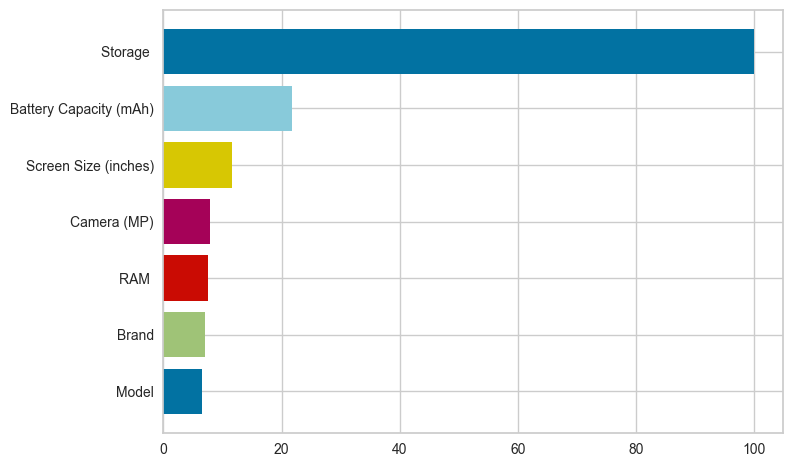

In [174]:
from xgboost import XGBRegressor
from yellowbrick.model_selection import FeatureImportances

column_names = x_train.columns.tolist()

regressor = XGBRegressor()

viz = FeatureImportances(regressor,topn=7)

viz.fit(x_train, y_train)

In [175]:
df1 = df[['Brand', 'Model', 'Storage ', 'Battery Capacity (mAh)', 'RAM ', 'Screen Size (inches)', 'Camera (MP)', 'Price ($)']]

df1.head()

,Brand,Model,Storage,Battery Capacity (mAh),RAM,Screen Size (inches),Camera (MP),Price ($)
0,0.0,149.0,1.0,3095,7.0,39.0,50.0,87.0
1,4.0,3.0,7.0,5000,1.0,29.0,0.0,40.0
2,15.0,101.0,1.0,4500,10.0,25.0,92.0,84.0
3,7.0,88.0,1.0,5020,7.0,24.0,23.0,60.0
4,10.0,71.0,1.0,4614,10.0,7.0,129.0,83.0


In [176]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

In [177]:
# Özellik isimlerini alın
feature_names = viz.features_

# İlk 11 özelliğin isimlerini alın
top_7_feature_names = feature_names[:7]

print(top_7_feature_names)

['Model' 'Brand' 'RAM ' 'Camera (MP)' 'Screen Size (inches)'
 'Battery Capacity (mAh)' 'Storage ']


In [178]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [179]:
#Test verilerini kullanarak çıktıyı tahmin et
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

In [180]:
y_pred_df = pd.DataFrame(data=y_pred,columns=["Tahmini_Sonuc"])

In [181]:
print(f"y_test length: {len(y_test)}")
print(f"y_pred length: {len(y_pred)}")

y_test length: 82
y_pred length: 82


In [182]:
import pandas as pd

# Model ile tahmin yapma
y_pred = model.predict(x_test)

# y_pred ve y_test verilerini DataFrame'e dönüştürme
y_pred_df = pd.DataFrame(data=y_pred, columns=["Tahmini_Sonuc"])
y_test_df = pd.DataFrame(data=y_test, columns=["Gerçek_Sonuç"])

# y_test_df ve y_pred_df DataFrame'lerini birleştirme
karsılastırma_df = pd.concat([y_test_df, y_pred_df], axis=1)

# Sonuçların görüntülenmesi
print(karsılastırma_df)


   Gerçek_Sonuç  Tahmini_Sonuc
0           NaN      34.850304
1           NaN      42.261791
2           NaN      71.199341
3           NaN       8.453887
4           NaN       3.069882
..          ...            ...
77          NaN      58.012642
78          NaN      31.652342
79          NaN      55.266895
80          NaN      79.363403
81          NaN       4.676369

[82 rows x 2 columns]


In [183]:
# y_test_df = pd.DataFrame(data=y_test,columns=["Gerçek_Sonuç"])

# karsılastırma_df = pd.concat([y_test_df, y_pred_df],axis=1)
# karsılastırma_df

In [184]:
# Ortalama Mutlak Hata (Mean Absolute Error - MAE)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Ortalama Kare Hatası (Mean Squared Error - MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Kök Ortalama Kare Hatası (Root Mean Squared Error - RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 8.859775441448862
Mean Squared Error (MSE): 294.89196611880925
Root Mean Squared Error (RMSE): 17.172418761456093


In [185]:
from sklearn.metrics import r2_score

x_train = r2_score(y_train, y_pred_train)
x_test = r2_score(y_test,y_pred)

print(f"Eğitim seti tahmin: {x_train}\n\nTest seti tahmin: {x_test}")

Eğitim seti tahmin: 0.9845368504391105

Test seti tahmin: 0.5385523249597459


In [186]:
import joblib

# Modeli kaydet
joblib.dump(model, "xgb_model.joblib")

# Seçilen özellik isimlerini kaydet
joblib.dump(top_7_feature_names, "top_7_feature_names.joblib")

['top_7_feature_names.joblib']

In [187]:
import joblib

# Özellik isimlerini yükleme
top_7_feature_names = joblib.load("top_7_feature_names.joblib")
top_7_feature_names

array(['Model', 'Brand', 'RAM ', 'Camera (MP)', 'Screen Size (inches)',
       'Battery Capacity (mAh)', 'Storage '], dtype=object)

In [188]:
df1 = df[['Brand', 'Model', 'Storage ', 'Battery Capacity (mAh)', 'RAM ', 'Screen Size (inches)', 'Camera (MP)', 'Price ($)']]

df1.head()

,Brand,Model,Storage,Battery Capacity (mAh),RAM,Screen Size (inches),Camera (MP),Price ($)
0,0.0,149.0,1.0,3095,7.0,39.0,50.0,87.0
1,4.0,3.0,7.0,5000,1.0,29.0,0.0,40.0
2,15.0,101.0,1.0,4500,10.0,25.0,92.0,84.0
3,7.0,88.0,1.0,5020,7.0,24.0,23.0,60.0
4,10.0,71.0,1.0,4614,10.0,7.0,129.0,83.0


In [189]:
df1.Brand.unique()

array([ 0.,  4., 15.,  7., 10.,  2.,  6.,  3., 13., 14.,  5., 12.,  1.,
        8.,  9., 11.])

In [190]:
# sample_one = [{
# "OverallQual":7,
# "GarageCars":2,
# "CentralAir_Y":1,
# "KitchenQual":0,
# "GrLivArea":1710,
# "TotalBsmtSF":856,
# "FireplaceQu":5,
# "LandContour":3,
# "ExterQual":3,
# "BsmtFinSF1":700,
# "GarageType":4 }]

In [191]:
sample_one = [{
'Model', 
'RAM ', 
'Brand', 
'Camera (MP)', 
'Screen Size (inches)',
'Battery Capacity (mAh)', 
'Storage ' }]

In [192]:
import pandas as pd
df_s = pd.DataFrame(sample_one)
df_s

,0,1,2,3,4,5,6
0,Brand,RAM,Model,Screen Size (inches),Storage,Battery Capacity (mAh),Camera (MP)


In [193]:
model = joblib.load("model.joblib")

FileNotFoundError: [Errno 2] No such file or directory: 'model.joblib'

In [ ]:
# pred_price = round(model.predict(df_s)[0])
# print(f"Your car's price: ${pred_price}")